In [2]:
import pandas as pd

In [3]:
arquivo= r'C:\Users\digve\OneDrive\Área de Trabalho\kc_house_data.csv'
dados = pd.read_csv(arquivo)
dados['Unnamed: 0']=''

# Q1

In [4]:
dados.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Unnamed: 0        object
dtype: object

# Q2

In [5]:
dados.drop(['id','Unnamed: 0'], axis=1, inplace=True)
dados.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Q3

In [6]:
dados['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [7]:
# Q4

<AxesSubplot:xlabel='waterfront', ylabel='price'>

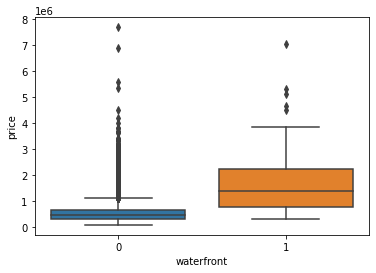

In [8]:
import seaborn as sns
sns.boxplot(x="waterfront", y="price", data=dados)

# Q5

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

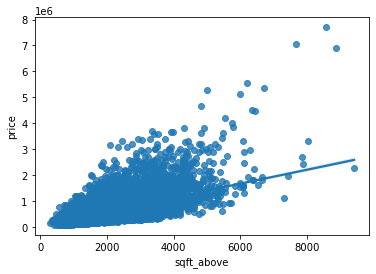

In [9]:
sns.regplot(x="sqft_above", y="price", data=dados)

# Q6

In [10]:
import scipy 
beta, alfa, r, p_v, std = scipy.stats.linregress(dados['sqft_living'], dados['price'])
print(r)


0.7020350546118003


# Q7

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
x_=dados[["floors","waterfront","lat",
                  "bedrooms","sqft_basement",
                  "view","bathrooms","sqft_living15",
                  "sqft_above","grade","sqft_living"]]
y_=dados[['price']]
linear.fit(x_,y_ )
y_pred =  linear.predict(x_)
r2=r2_score(y_,y_pred)
print(r2)


0.6576964580573578


# Q8

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
modelo = pipe.fit(x_,y_ )
y_pred =  modelo.predict(x_)
r2=r2_score(y_,y_pred)
print(r2)


0.7504733927694993


# Q9

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)

reg_ridge=Ridge(alpha=0.1)
model_ridge = reg_ridge.fit(X_train,y_train)

y_pred_test =  model_ridge.predict(X_test)
r2=r2_score(y_test,y_pred_test)
print(r2)


0.6614734596866659


# Q10

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)

Input=[('polynomial', PolynomialFeatures(degree =2,include_bias=False)),('model',Ridge(alpha=0.1))]
pipe = Pipeline(Input)

model_ridge = pipe.fit(X_train,y_train)

y_pred_test =  model_ridge.predict(X_test)
r2=r2_score(y_test,y_pred_test)
print(r2)

0.7003486865819589
